### FUNCTIONS / LIBRARIES

In [1]:
# Functions Optmization

from Optimization import prepare_vehicles_with_stats
from Optimization import spatial_optimization_pipeline
from Optimization import run_fairness_pipeline
from Optimization import run_max_coverage_pipeline
from Optimization import combine_optimized_dfs
from Optimization import compute_combined_optimization_scores
from Optimization import select_random_vehicles
from Optimization import vehicle_optimization_stats_pipeline
from Optimization import extract_string_lists # Done (call if needed)
from Optimization import plot_vehicles_by_group # Done (call if needed)
from Optimization import prepare_selected_vehicles_from_combined 
from Optimization import master_function_analysis
from Optimization import visualization_master_function
from Optimization import pipeline_plot_frequency

import warnings
import geopandas as gpd
import pandas as pd

In [2]:
# Set the warning filter to ignore SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)


### RAW DATA / PARAMETERS 

In [3]:
# Full CBS
cbs_full = gpd.read_file('data/temp/full_cbs.gpkg')

# CIty Stats

city_stats = pd.read_csv('data/city_stats_amsterdam.csv')

# Gruped by points 
points_gdf = gpd.read_file('data/temp/grouped_by_points_GVB_3days.gpkg') # 3 days

# Parameters
City = 'Amsterdam'

# City Boundary 
city_geo = gpd.read_file("data/Gemeente2.geojson")

### PROCESS

In [ ]:
# Usage Create Vehicles with Stats # 322 unique vehicles
vehicles_stats = prepare_vehicles_with_stats(points_gdf, cbs_full) # We could add the days - 

In [8]:
vehicles_stats

,uni_id,route_id,route_type_left,crs28922_list,min_new_timest,max_new_timest,count,A_inhab,A_0_15,A_15_25,A_25_45,A_45_65,A_65+,A_nederlan,A_west_mig,A_n_west_m,G_woz_woni,geometry
91,1921_GVB,"[91905, 91909, 91910, 91945, 91947, 91949, 91952]",3.0,"[E1209N4850, E1208N4851, E1208N4850, E1278N478...",1710480607,1710717565,14296,155935.0,19287,19972,62271,35678,18727,65711,33858,56366,456.9,"MULTIPOINT (118631.03 485722.032, 118640.268 4..."
80,1910_GVB,"[91905, 91910, 91945, 91946, 91950, 91951, 91952]",3.0,"[E1209N4850, E1208N4851, E1208N4850, E1187N485...",1710485722,1710739493,17009,141435.0,17188,18228,57378,32310,16331,59353,30548,51534,462.8,"MULTIPOINT (117656.651 488817.257, 117670.928 ..."
240,2253_GVB,"[91905, 91907, 91909, 91910, 91947, 91951]",3.0,"[E1196N4840, E1196N4841, E1195N4841, E1133N485...",1710546041,1710716932,14063,134620.0,17049,17114,53689,30891,15877,54721,27774,52125,412.3,"MULTIPOINT (115332.281 486297.8, 115331.786 48..."
257,2273_GVB,"[91938, 91907, 91909, 91941, 91950, 91952]",3.0,"[E1187N4854, E1186N4854, E1186N4855, E1187N485...",1710511833,1710739378,7986,133995.0,16647,17217,53757,30380,15994,55885,28101,50009,437.1,"MULTIPOINT (117684.72 488942.954, 117490.448 4..."
88,1918_GVB,"[91946, 91947, 91949, 91910]",3.0,"[E1230N4876, E1231N4876, E1231N4877, E1133N485...",1710480727,1710739723,9443,115310.0,14079,15911,46059,25459,13802,45023,23976,46311,422.0,"MULTIPOINT (123355.309 486835.951, 123334.737 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,3003_GVB,[91912],0.0,"[E1200N4837, E1200N4838, E1197N4832, E1196N483...",1710485983,1710607706,4073,2160.0,221,213,1039,343,344,823,673,664,468.6,"MULTIPOINT (119686.978 481561.813, 119686.476 ..."
267,3008_GVB,[91912],0.0,"[E1200N4837, E1200N4838, E1197N4832, E1196N483...",1710480718,1710739433,6644,2160.0,221,213,1039,343,344,823,673,664,468.6,"MULTIPOINT (119979.633 483780.189, 119979.633 ..."
308,3070_GVB,[91912],0.0,"[E1197N4832, E1200N4837, E1200N4838, E1196N483...",1710481814,1710716077,7894,2160.0,221,213,1039,343,344,823,673,664,468.6,"MULTIPOINT (119686.98 481569.123, 119686.701 4..."
293,3053_GVB,[91912],0.0,"[E1197N4832, E1200N4837, E1200N4838, E1196N483...",1710615169,1710616304,170,2125.0,216,212,1028,331,338,811,653,661,466.2,"MULTIPOINT (119686.985 481582.314, 119685.206 ..."


In [ ]:
# Export Vehicle Stats
# vehicles_stats.to_file('data/temp/vehicles_stats_AMS_50buffer_1503.gpkg', driver='GPKG')

In [9]:
# Selecte Vehicles for Spatial Optimization
optimized_spatial, filtered_vehicles, max_space_vehicles = spatial_optimization_pipeline(points_gdf, cbs_full, vehicles_stats, coverage_threshold=3, top_n=10)

In [14]:
# Selecte Vehicles for Fairness Optimization
closest_simple, closest_relative, closest_absolute, df_area_stats, df_opts, fair_vehicles = run_fairness_pipeline(vehicles_stats, city_stats, n=10)

<Axes: >

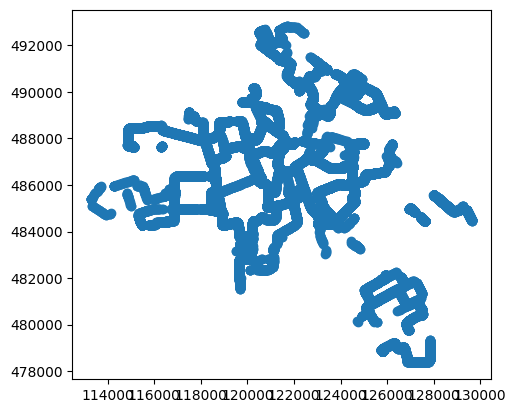

In [16]:
closest_relative.plot()

In [19]:
# Selecte Vehicles for Max Coverage Optimization

tops, cbs_lists, max_number, gdf_filtered, max_pop_vehicles = run_max_coverage_pipeline(vehicles_stats, cbs_full, n=10)

max_A_inhab       = tops['max_A_inhab']
max_A_old         = tops['max_A_65+']
max_A_young       = tops['max_A_0_15']
max_A_dutch       = tops['max_A_nederlan']
max_A_non_western = tops['max_A_n_west_m']
max_P_old         = tops['max_P_65+']
max_P_non_western = tops['max_P_n_west_m']
max_point_count   = tops['max_count']

In [27]:
# Create Combined First Itearation 

combined_df = combine_optimized_dfs(max_space_vehicles, max_pop_vehicles, fair_vehicles)

In [28]:
combined_df

,max_spatial,max_A_inhab,max_A_65+,max_A_0_15,max_A_nederlan,max_A_n_west_m,max_P_65+,max_P_n_west_m,max_count,closest_absolute,closest_relative,closest_simple
0,1921_GVB,1921_GVB,1921_GVB,1921_GVB,1921_GVB,1921_GVB,1127_GVB,1117_GVB,1607_GVB,320_GVB,320_GVB,320_GVB
1,309_GVB,1910_GVB,1910_GVB,1910_GVB,1910_GVB,2253_GVB,322_GVB,1125_GVB,1142_GVB,1462_GVB,1462_GVB,2258_GVB
2,2070_GVB,2253_GVB,2273_GVB,2253_GVB,2273_GVB,1910_GVB,1607_GVB,337_GVB,1416_GVB,1910_GVB,1910_GVB,1418_GVB
3,1168_GVB,2273_GVB,2253_GVB,2273_GVB,2253_GVB,2273_GVB,1423_GVB,1118_GVB,2074_GVB,323_GVB,1453_GVB,323_GVB
4,1603_GVB,1918_GVB,326_GVB,1918_GVB,2258_GVB,1918_GVB,2201_GVB,1154_GVB,1143_GVB,1144_GVB,1402_GVB,2080_GVB
5,1124_GVB,1902_GVB,1902_GVB,2257_GVB,1168_GVB,1902_GVB,2204_GVB,1470_GVB,2086_GVB,1418_GVB,323_GVB,1910_GVB
6,2123_GVB,2258_GVB,1918_GVB,2261_GVB,1902_GVB,326_GVB,3027_GVB,1463_GVB,2107_GVB,2258_GVB,1144_GVB,1144_GVB
7,1605_GVB,2261_GVB,1418_GVB,2258_GVB,1402_GVB,1605_GVB,3062_GVB,1157_GVB,330_GVB,1453_GVB,1921_GVB,2057_GVB
8,2179_GVB,1906_GVB,1402_GVB,2270_GVB,2261_GVB,1454_GVB,3067_GVB,1104_GVB,2089_GVB,2080_GVB,1418_GVB,2023_GVB
9,3031_GVB,2264_GVB,323_GVB,2264_GVB,1918_GVB,1603_GVB,3057_GVB,1465_GVB,2041_GVB,2057_GVB,2258_GVB,1462_GVB


In [29]:
# Combined vehicles (based on chosen columns) - not included 
scores_combined_df, top_combined_final = compute_combined_optimization_scores(combined_df)

In [30]:
# Create Random Vehicles 
random_vehicles = select_random_vehicles(vehicles_stats, n=10) 

In [31]:
print(combined_df.columns.tolist())


['max_spatial', 'max_A_inhab', 'max_A_65+', 'max_A_0_15', 'max_A_nederlan', 'max_A_n_west_m', 'max_P_65+', 'max_P_n_west_m', 'max_count', 'closest_absolute', 'closest_relative', 'closest_simple']


In [32]:
fair_vehicles

,closest_absolute,closest_relative,closest_simple
0,320_GVB,320_GVB,320_GVB
1,1462_GVB,1462_GVB,2258_GVB
2,1910_GVB,1910_GVB,1418_GVB
3,323_GVB,1453_GVB,323_GVB
4,1144_GVB,1402_GVB,2080_GVB
5,1418_GVB,323_GVB,1910_GVB
6,2258_GVB,1144_GVB,1144_GVB
7,1453_GVB,1921_GVB,2057_GVB
8,2080_GVB,1418_GVB,2023_GVB
9,2057_GVB,2258_GVB,1462_GVB


In [33]:
# Create Selected Vehicles Stats
final_df_cells_test = vehicle_optimization_stats_pipeline(
    vehicles_stats,
    cbs_full,
    city_stats,
    max_space_vehicles,
    max_pop_vehicles,
    fair_vehicles,
    top_combined_final, # as these are not included in the final analysis
    random_vehicles
)

In [34]:
final_df_cells_test

,max_spatial,max_A_inhab,max_A_65+,max_A_0_15,max_A_nederlan,max_A_n_west_m,max_P_65+,max_P_n_west_m,max_count,fairest_absolute,fairest_relative,fairest_simple,combined_opt,random,Amsterdam
A_inhab,778030.00,1223040.00,1171675.00,1203655.00,1209460.00,1191445.00,181665.00,246285.00,443455.00,770050.00,919865.00,793070.00,919160.00,521035.00,-
A_0_15,97478.00,151496.00,145081.00,153336.00,149681.00,148239.00,21934.00,38902.00,52145.00,95462.00,114151.00,96484.00,116015.00,62880.00,-
A_65+,98566.00,143640.00,149588.00,141041.00,145960.00,143250.00,32155.00,28843.00,60236.00,99757.00,120379.00,102814.00,115319.00,64267.00,-
A_nederlan,336965.00,510089.00,497024.00,504069.00,512918.00,478267.00,93092.00,63097.00,203724.00,340568.00,406555.00,352288.00,394445.00,227556.00,-
A_n_west_m,274152.00,453996.00,429768.00,451152.00,439190.00,467045.00,45202.00,151349.00,141445.00,266582.00,319103.00,270394.00,332113.00,178339.00,-
count,217227.00,167558.00,175198.00,161657.00,159032.00,154132.00,159558.00,125361.00,383270.00,192238.00,185691.00,198049.00,258418.00,171357.00,5778993
A_inhab_uniq,387525.00,223305.00,276795.00,239740.00,296030.00,273035.00,51195.00,36980.00,220835.00,314490.00,294650.00,307365.00,331265.00,269625.00,870375.0
A_0_15_uniq,50021.00,28702.00,35904.00,30818.00,39221.00,36302.00,6837.00,6041.00,27034.00,40895.00,38929.00,39181.00,42978.00,33278.00,122388
A_65+_uniq,49326.00,27128.00,36014.00,29387.00,37139.00,33905.00,9240.00,4179.00,29325.00,39561.00,37778.00,39196.00,41845.00,34036.00,112084
A_nederlan_uniq,170842.00,91805.00,117982.00,100568.00,126966.00,116582.00,25467.00,10145.00,100186.00,138088.00,129154.00,135206.00,142192.00,120018.00,382106


In [69]:
# Createa CSV with the selected vehicles
# combined_df.to_csv('data/temp/combined_df_10_AMS_1503.csv', index=False)

In [ ]:
# Usage Visualization Quick (Only if needed!)

# lists_dict = extract_string_lists(combined_df)
# lists_dict.keys()
# plot_vehicles_by_group(vehicles_stats, lists_dict, city_geo) 

In [17]:
# TO DO: FINISH PIPELINE - CREATA OPTMIZED VEHICLES, VIZ ANALYSIS MAIN (separate script?), + FREQUENCY (separate script?)

In [31]:
# THIS CAN BE A NEW SEPARAE SCRIPT VISUALISATION! 

In [35]:
# Test for Max Spatial

In [ ]:
# # Create Optmized Vehicles GDFs 
# max_space_gdf = prepare_selected_vehicles_from_combined(vehicles_stats, combined_df, column='max_spatial')
# # Create Main Analysis 
# sums_df, cbs_gdf, joined_gdf, average_stats = master_function_analysis(
#     max_space_gdf, cbs_full,50)
# # Create Main Visualization 
# fig1, fig2, fig3, fig4 = visualization_master_function(
#     max_space_gdf, cbs_full, joined_gdf, city_geo, 50, sums_df, average_stats)